# NGS2 Cycle 1: predictions

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We begin with the data produced by the simulations:

In [2]:
data = {
    "control": (14, 52),  # (public, ingroup)
    "intergroup_competition": (15, 55),
    "intragroup_competition": (11, 54),
    "identity_selection": (13, 50),
    "relative_deprivation": (16, 52),
    "population_size": (36, 56),
    "rounds": (50, 50),
    "interpersonal_communication": (14, 52),
    "identity_signaling": (14, 52),
    "scarcity": (14, 52),
}

## Predictions 1: Ingroup vs. public resource contributions

First, we do a bit of preprocessing:

In [3]:
import pprint 
results = {}
for condition in data:
    ratio = float(data[condition][1]) / float(data[condition][0])
    results[condition] = math.log(ratio, 2)
   
pprint.pprint(results, indent=4)

{   'control': 1.893084796083488,
    'identity_selection': 1.9434164716336328,
    'identity_signaling': 1.893084796083488,
    'intergroup_competition': 1.8744691179161412,
    'interpersonal_communication': 1.893084796083488,
    'intragroup_competition': 2.2954558835261714,
    'population_size': 0.6374299206152918,
    'relative_deprivation': 1.7004397181410922,
    'rounds': 0.0,
    'scarcity': 1.893084796083488}


Next we import plotting tools:

In [4]:
import os 
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def print_conditions(results):
    for cnd in enumerate(sorted(results.iterkeys())):
        print(cnd)
    
def plot_contributions(results):
    fig, ax = plt.subplots()
    means = [results[cnd] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k')
    ax.set_ylim([-3, 3])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('center')
    ax.set_xticks(idxs)
    plt.ylabel("Log$_2$ ratio of ingroup:outgroup contributions")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, (cnd for cnd in sorted(results.iterkeys())))
    fig.savefig("contributions.pdf", bbox_inches='tight')
    plt.show()

Now we plot the predictions:

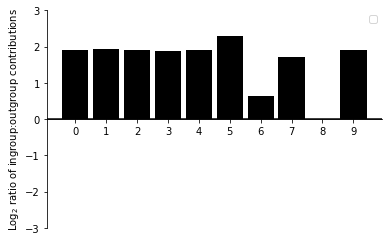

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [5]:
plot_contributions(results)
print_conditions(results)

## Predictions 2: DIFI

In [6]:
def ratio2difi(ratio, mn=-100, mx=125):
    return mn + (mx - mn) * (1.0 / (1 + math.exp(-ratio)))

def plot_difi(results):
    fig, ax = plt.subplots()
    means = [results[cnd] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k')
    ax.set_ylim([-100, 125])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks(idxs)
    plt.ylabel("DIFI Distance")
    fig.savefig("difi.pdf", bbox_inches='tight')
    plt.show()

In [7]:
import pprint 
results = {}
for condition in data:
    ratio = float(data[condition][1]) / float(data[condition][0])
    results[condition] = ratio2difi(math.log(ratio, 2))
   
pprint.pprint(results, indent=4)

{   'control': 95.54904284919098,
    'identity_selection': 96.81357474849548,
    'identity_signaling': 95.54904284919098,
    'intergroup_competition': 95.0692726850589,
    'interpersonal_communication': 95.54904284919098,
    'intragroup_competition': 104.41249940094565,
    'population_size': 47.18875845708433,
    'relative_deprivation': 90.25823507916226,
    'rounds': 12.5,
    'scarcity': 95.54904284919098}


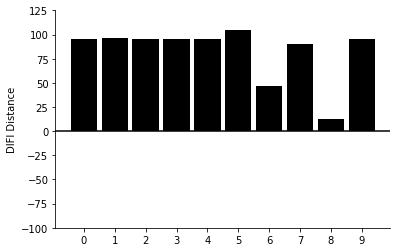

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [8]:
plot_difi(results)
print_conditions(results)

## Predictions 3: Leach et al. (2008) survey

Predictons for the Leach et al. (2008) survey:

In [9]:
def ratio2leach(ratio, mn=1, mx=7):
    return mn + (mx - mn) * (1.0 / (1 + math.exp(-0.5 * ratio)))


def plot_leach(results):
    fig, ax = plt.subplots()
    means = [results[cnd] for cnd in sorted(results.iterkeys())]
    idxs = np.arange(len(results))
    rects1 = ax.bar(idxs, means, 0.85, color='k')
    ax.set_ylim([1, 7])
    plt.axhline(y=0, color='k', linestyle='-')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks(idxs)
    plt.ylabel("Average Leach et al. (2008) survey response")
    fig.savefig("leach.pdf", bbox_inches='tight')
    plt.show()

In [10]:
import pprint 
results = {}
for condition in data:
    ratio = float(data[condition][1]) / float(data[condition][0])
    results[condition] = ratio2leach(math.log(ratio, 2))
   
pprint.pprint(results, indent=4)

{   'control': 5.322515770056516,
    'identity_selection': 5.352759126720151,
    'identity_signaling': 5.322515770056516,
    'intergroup_competition': 5.311244277401545,
    'interpersonal_communication': 5.322515770056516,
    'intragroup_competition': 5.554574029438703,
    'population_size': 4.474066277469712,
    'relative_deprivation': 5.203679565385935,
    'rounds': 4.0,
    'scarcity': 5.322515770056516}


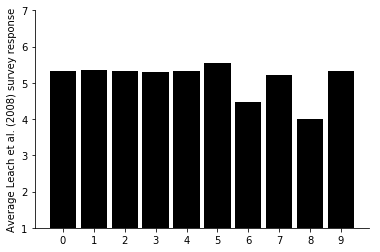

(0, 'control')
(1, 'identity_selection')
(2, 'identity_signaling')
(3, 'intergroup_competition')
(4, 'interpersonal_communication')
(5, 'intragroup_competition')
(6, 'population_size')
(7, 'relative_deprivation')
(8, 'rounds')
(9, 'scarcity')


In [11]:
plot_leach(results)
print_conditions(results)